# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [29]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,24,99,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201
1,433,85,42,70,130,56,7,150,45,19,145,177,328,172,82,10,14,181,185
2,655,86,35,44,110,54,2,119,57,17,121,139,208,137,90,6,1,180,183
3,67,98,55,101,219,69,11,225,30,25,178,231,748,216,74,6,14,187,195
4,384,88,44,71,145,56,8,142,48,19,143,159,296,174,68,7,18,188,197
5,639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197
6,415,101,53,108,184,54,12,216,31,24,172,220,685,187,68,4,24,190,201
7,548,94,39,75,184,72,8,155,42,19,133,175,365,145,70,4,5,192,200
8,197,82,44,72,150,64,7,154,44,19,144,181,350,177,80,0,16,183,187
9,396,108,57,106,177,51,5,256,26,28,170,285,966,261,87,11,2,182,181


Methods `describe` and `info` deliver some useful information.

In [30]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.488160,93.415301,44.834244,81.511840,167.703097,61.801457,8.766849,167.710383,41.218579,20.500911,148.060109,188.098361,434.147541,175.132969,72.970856,6.484517,12.408015,188.581056,195.191257
std,240.692671,8.390265,6.012140,15.659071,34.179875,8.890181,5.489897,33.145965,7.800404,2.569206,14.248128,31.564518,175.951247,31.529944,7.911178,4.885013,8.958807,5.956295,7.244293
min,1.000000,76.000000,33.000000,44.000000,104.000000,48.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,138.000000,167.000000,314.000000,151.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,420.000000,92.000000,44.000000,80.000000,164.000000,61.000000,8.000000,155.000000,43.000000,19.000000,146.000000,177.000000,355.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,625.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,589.000000,198.000000,76.000000,10.000000,19.000000,192.000000,201.000000
max,845.000000,116.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [31]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Firstly, remove 1st column from data, because it describe index in table only:

In [32]:
pd.DataFrame(data).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
5,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183
6,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202
8,8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208
9,9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204


In [33]:
X_train = np.delete(X_train, 0, 1)
X_test = np.delete(X_test, 0, 1)

In [34]:
print(X_train.shape, X_test.shape)

(549, 18) (297, 18)


Now normalize data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.666224,1.359450,1.501339,1.502161,0.472698,0.407146,1.095841,-1.182886,0.973596,1.190005,1.043312,1.074302,1.551274,-0.628906,-1.328641,-0.715928,0.406486,0.802568
1,-1.003899,-0.471850,-0.735825,-1.104085,-0.653164,-0.322130,-0.534802,0.485215,-0.584725,-0.214969,-0.351929,-0.603828,-0.099455,1.142356,0.720303,0.177863,-1.273941,-1.408081
2,-0.884604,-1.637223,-2.397719,-1.689758,-0.878337,-1.233724,-1.470912,2.024999,-1.363886,-1.900937,-1.556911,-1.286457,-1.210524,2.154505,-0.099275,-1.274547,-1.441984,-1.684412
3,0.546929,1.692413,1.245663,1.502161,0.810457,0.407146,1.729980,-1.439517,1.752756,2.103237,1.360413,1.785373,1.297316,0.130206,-0.099275,0.177863,-0.265685,-0.026425
4,-0.646015,-0.138886,-0.671906,-0.664830,-0.653164,-0.139811,-0.776379,0.870161,-0.584725,-0.355466,-0.922710,-0.785863,-0.035966,-0.628906,0.105620,0.624758,-0.097642,0.249906


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

In [38]:
from sklearn.pipeline import Pipeline

logreg = LogisticRegression(multi_class='multinomial', solver='saga',
                            tol=1e-3, max_iter=500, random_state=42)
pipe = Pipeline(steps=[('scale', StandardScaler()),
                       ('logreg', logreg)])

params = {
    "logreg__C": np.linspace(1e-10, 1)
}

gsearch = GridSearchCV(estimator = pipe, param_grid = params,
                    n_jobs=-1, cv = 10)
clf = gsearch.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)

best_param_lr = gsearch.best_params_['logreg__C'] #it's for task 2.6

Best parameter (CV score=0.790):
{'logreg__C': 0.734693877577551}


In [39]:
def scores(X_test, clf):
    y_pred = clf.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')
    acc = accuracy_score(y_test, y_pred)
    print("f1 score: ", f1)
    print("accuracy score: ", acc)
scores(X_test, clf)

f1 score:  0.7505845167339655
accuracy score:  0.7373737373737373


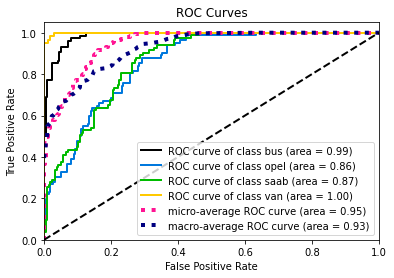

In [40]:
def roc_curves(X_test, clf):
    y_probas = clf.predict_proba(X_test)
    plot_roc(y_test, y_probas)
    plt.show()
roc_curves(X_test, clf)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

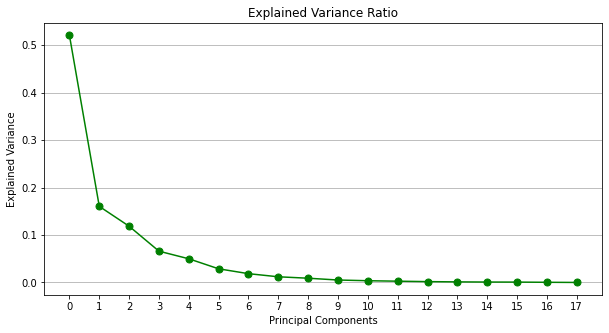

In [41]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
expl_var = pca.explained_variance_ratio_

x = np.arange(0,X_train.shape[1])
plt.figure(figsize=(10,5))
plt.plot(x, expl_var,
         c = "g", marker='o', markersize=7)
plt.grid(which='major', axis='y')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.xticks(x)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [42]:
pca = PCA(n_components=9)
pca.fit(X_train)

X_train_pca_transform = pca.transform(X_train)
X_test_pca_transform = pca.transform(X_test)

According to plot from 2.2 explained variance ratio approximately 0 for components after 9. We should normalize data before using PCA, it is necessary for a reasonable choice of the metric in which the directions of the greatest scatter will be sought.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [43]:
from sklearn.pipeline import Pipeline

logreg = LogisticRegression(multi_class='multinomial', solver='saga',
                            tol=1e-3, random_state=42)
pipe = Pipeline(steps=[('scale', StandardScaler()),
                       ('pca', pca),
                       ('logreg', logreg)])

params = {
    "logreg__max_iter": [350, 400, 450, 500],
    "logreg__C": np.linspace(1e-10, 1)
}

gsearch = GridSearchCV(estimator = pipe, param_grid = params,
                    n_jobs=-1, cv = 10)
clf_pca = gsearch.fit(X_train_pca_transform, y_train)

print("Best parameters (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)

Best parameters (CV score=0.723):
{'logreg__C': 0.5510204082081632, 'logreg__max_iter': 350}


In [44]:
scores(X_test_pca_transform, clf_pca)

f1 score:  0.7208793146420749
accuracy score:  0.7104377104377104


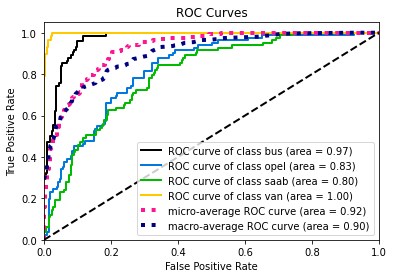

In [45]:
roc_curves(X_test_pca_transform, clf_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
pipe = Pipeline(steps=[('scale', StandardScaler()),
                       ('dtree', dtree)])

params = {
    "dtree__max_depth": np.arange(1, 50, 1)
}

gsearch = GridSearchCV(estimator = pipe, param_grid = params,
                    n_jobs=-1, cv = 10)
clf_dtree = gsearch.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)

best_param_dtree = gsearch.best_params_['dtree__max_depth'] #it's for task 2.6

Best parameter (CV score=0.732):
{'dtree__max_depth': 17}


In [47]:
scores(X_test, clf_dtree)

f1 score:  0.664846465668834
accuracy score:  0.6464646464646465


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [48]:
from sklearn.ensemble import BaggingClassifier

logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=500,
                            tol=1e-3, random_state=42, C=best_param_lr)
pipe_lr = Pipeline(steps=[('scale', StandardScaler()),
                       ('logreg', logreg)])
lr_f1_scores=[]
lr_acc_scores=[]
for i in np.arange(2,100,5):
    bg_clf = BaggingClassifier(base_estimator=pipe_lr, n_estimators=i,
                                 random_state=42, n_jobs=-1).fit(X_train, y_train)
    y_pred = bg_clf.predict(X_test)
    lr_f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    lr_acc_scores.append(accuracy_score(y_test, y_pred))


In [49]:
dtree = DecisionTreeClassifier(max_depth=best_param_dtree, random_state=42)
pipe_dt = Pipeline(steps=[('scale', StandardScaler()),
                       ('dtree', dtree)])
dt_f1_scores=[]
dt_acc_scores=[]
for i in np.arange(2,100,5):
    bg_clf = BaggingClassifier(base_estimator=pipe_dt, n_estimators=i,
                                 random_state=42, n_jobs=-1).fit(X_train, y_train)
    y_pred = bg_clf.predict(X_test)
    dt_f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    dt_acc_scores.append(accuracy_score(y_test, y_pred))

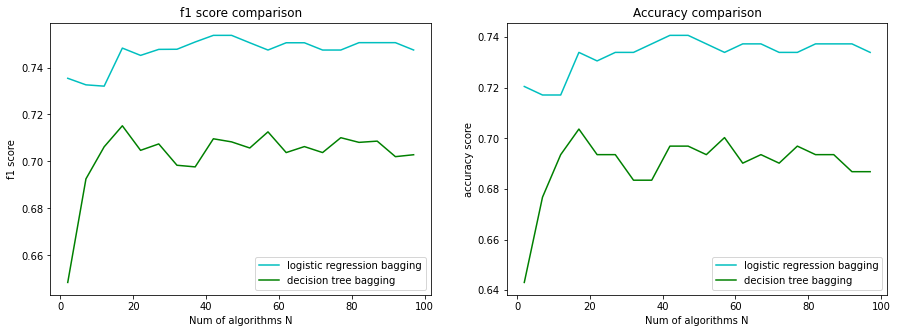

In [50]:
import matplotlib.pyplot as plt

x = np.arange(2,100,5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('f1 score comparison')
ax1.set_ylabel('f1 score')
ax1.set_xlabel('Num of algorithms N')
ax1.plot(x, lr_f1_scores, 'c', label='logistic regression bagging')
ax1.plot(x, dt_f1_scores, 'g', label='decision tree bagging')
ax1.legend(loc='best')

ax2.set_title('Accuracy comparison')
ax2.set_ylabel('accuracy score')
ax2.set_xlabel('Num of algorithms N')
ax2.plot(x, lr_acc_scores, 'c', label='logistic regression bagging')
ax2.plot(x, dt_acc_scores, 'g', label='decision tree bagging')
ax2.legend(loc='best')
f.show()

Since the results differ for different launches, I calculated the optimal number as an average of 10 plottings.

Optimal numbers for logreg: 27, 7, 2, 2, 17, 22, 12, 2, 2, 7 $\rightarrow$ 10

Optimal numbers for decision trees: 17,42,17,17,17, 42, 37, 17, 72, 37 $\rightarrow$ 32

Hyperparameters from 2.5 are not optimal for the ensemble, because ensembles of trees give better result with differences between models.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_f1_scores=[]
rf_acc_scores=[]
for i in np.arange(2,100,5):
    rf_clf = RandomForestClassifier(n_estimators=i, 
                                    random_state=42, n_jobs=-1).fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    rf_f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    rf_acc_scores.append(accuracy_score(y_test, y_pred))

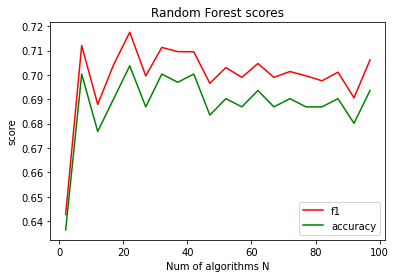

In [52]:
x = np.arange(2,100,5)

plt.figure()
plt.title('Random Forest scores')
plt.ylabel('score')
plt.xlabel('Num of algorithms N')
plt.plot(x, rf_f1_scores, 'r', label='f1')
plt.plot(x, rf_acc_scores, 'g', label='accuracy')
plt.legend(loc='best')
plt.show()

Like in 2.6 we find optimal number of trees from 10 launches: 47, 52, 27, 42, 27, 17, 67, 7, 87, 27 $\rightarrow$ 40.

It is close to optimal number in 2.6. Moreover, if you run 2.6 and 2.7 in a row, then the optimal numbers will be similar. This happens, because Random Forest is the enhanced version of bagging, but Random Forest is a bit better, because it has more randomization 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [53]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=500,
                            tol=1e-3, random_state=42, C=best_param_lr)
dtree = DecisionTreeClassifier(max_depth=best_param_dtree, random_state=42)
randf = RandomForestClassifier(n_estimators=17, random_state=42, n_jobs=-1)

acc_scores=[]
f1_scores=[]
size = X_train.shape[0]

for i in range(10):
    num_features = int((i+1)*size/10)
    clf_lr = logreg.fit(X_train[:num_features], y_train[:num_features])
    clf_dt = dtree.fit(X_train[:num_features], y_train[:num_features])
    clf_rf = randf.fit(X_train[:num_features], y_train[:num_features])
    lr_y_pred = clf_lr.predict(X_test)
    dt_y_pred = clf_dt.predict(X_test)
    rf_y_pred = clf_rf.predict(X_test)
    f1_scores.append([f1_score(y_test, lr_y_pred, average='macro'),
                    f1_score(y_test, dt_y_pred, average='macro'),
                    f1_score(y_test, rf_y_pred, average='macro')])
    acc_scores.append([accuracy_score(y_test, lr_y_pred),
                     accuracy_score(y_test, dt_y_pred),
                     accuracy_score(y_test, rf_y_pred)])

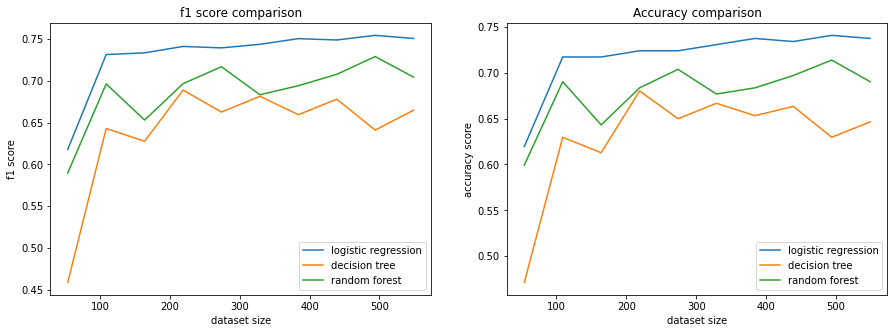

In [54]:
x = []
for i in range(10):
    x.append(int((i+1)*size/10))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('f1 score comparison')
ax1.set_ylabel('f1 score')
ax1.set_xlabel('dataset size')
ax1.plot(x, f1_scores, label=['logistic regression', 'decision tree', 'random forest'])
ax1.legend(loc='best')

ax2.set_title('Accuracy comparison')
ax2.set_ylabel('accuracy score')
ax2.set_xlabel('dataset size')
ax2.plot(x, acc_scores, label=['logistic regression', 'decision tree', 'random forest'])
ax2.legend(loc='best')
f.show()

Optimal values are reached on approximately 200-300 features, then random forest and logistic regression improve quality, but not much, decision tree often overfits.